# Classification with Tensorflow


## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Cleaning of  Data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
import tensorflow as tf

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative method
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

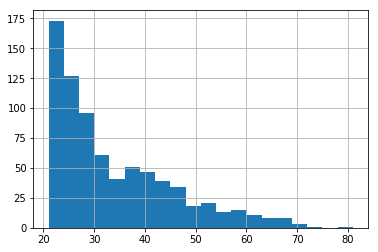

In [12]:
diabetes['Age'].hist(bins=20)

In [15]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Stacking them together

In [16]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [17]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### The Model

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHADAAB\\AppData\\Local\\Temp\\tmpj7y57929', '_is_chief': True, '_device_fn': None, '_train_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B4701C9128>, '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_evaluation_master': '', '_master': '', '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_id': 0, '_save_checkpoints_steps': None, '_service': None, '_log_step_count_steps': 100}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SHADAAB\AppData\Local\Temp\tmpj7y57929\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 124.543
INFO:tensorflow:loss = 6.1591024, step = 101 (0.819 sec)
INFO:tensorflow:global_step/sec: 272.164
INFO:tensorflow:loss = 7.596295, step = 201 (0.365 sec)
INFO:tensorflow:global_step/sec: 223.968
INFO:tensorflow:loss = 6.5931954, step = 301 (0.449 sec)
INFO:tensorflow:global_step/sec: 279.233
INFO:tensorflow:loss = 9.891785, step = 401 (0.345 sec)
INFO:tensorflow:global_step/sec: 291.477
INFO:tensorflow:loss = 5.1846833, step = 501 (0.344 sec)
INFO:tensorflow:global_step/sec: 220.353
INFO:tensorflow:loss = 6.556141, step = 601 (0.450 sec)
INFO:tensorflow:global_step/se

## Evaluation

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-21-09:59:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHADAAB\AppData\Local\Temp\tmpj7y57929\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-21-09:59:10
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.78398377, auc_precision_recall = 0.61988354, average_loss = 0.5397482, global_step = 1000, label/mean = 0.34251967, loss = 5.2729244, precision = 0.58426964, prediction/mean = 0.398245, recall = 0.59770113
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SHADAAB\AppData\Local\Temp\tmpj7y57929\model.ckpt-1000


In [28]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78398377,
 'auc_precision_recall': 0.61988354,
 'average_loss': 0.5397482,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2729244,
 'precision': 0.58426964,
 'prediction/mean': 0.398245,
 'recall': 0.59770113}

## Predictions

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [30]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [31]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHADAAB\AppData\Local\Temp\tmpj7y57929\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.576393], dtype=float32),
  'logits': array([0.3079837], dtype=float32),
  'probabilities': array([0.42360696, 0.576393  ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.65443206], dtype=float32),
  'logits': array([0.63857824], dtype=float32),
  'probabilities': array([0.34556803, 0.654432  ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4376736], dtype=float32),
  'logits': array([-0.25060892], dtype=float32),
  'probabilities': array([0.5623264 , 0.43767363], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35744715], dtype=float32),
  'logits': array([-0.58646166], dtype=float32),
  'probabilities': array([0.64255285, 0.35744712], dtype=float32)},
 {'class_i

# DNN Classifier

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHADAAB\\AppData\\Local\\Temp\\tmp5ovr7hvc', '_is_chief': True, '_device_fn': None, '_train_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B4732B0B00>, '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_evaluation_master': '', '_master': '', '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_id': 0, '_save_checkpoints_steps': None, '_service': None, '_log_step_count_steps': 100}


In [35]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [36]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SHADAAB\\AppData\\Local\\Temp\\tmp87clba0_', '_is_chief': True, '_device_fn': None, '_train_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B4732B0F60>, '_global_id_in_cluster': 0, '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_session_config': None, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_evaluation_master': '', '_master': '', '_num_ps_replicas': 0, '_tf_random_seed': None, '_task_id': 0, '_save_checkpoints_steps': None, '_service': None, '_log_step_count_steps': 100}


In [39]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SHADAAB\AppData\Local\Temp\tmp87clba0_\model.ckpt.
INFO:tensorflow:loss = 6.729998, step = 1
INFO:tensorflow:global_step/sec: 114.586
INFO:tensorflow:loss = 5.4293513, step = 101 (0.871 sec)
INFO:tensorflow:global_step/sec: 245.754
INFO:tensorflow:loss = 6.7898293, step = 201 (0.408 sec)
INFO:tensorflow:global_step/sec: 231.031
INFO:tensorflow:loss = 5.0342, step = 301 (0.433 sec)
INFO:tensorflow:global_step/sec: 224.492
INFO:tensorflow:loss = 6.841567, step = 401 (0.442 sec)
INFO:tensorflow:global_step/sec: 237.601
INFO:tensorflow:loss = 4.2228484, step = 501 (0.421 sec)
INFO:tensorflow:global_step/sec: 236.929
INFO:tensorflow:loss = 3.1565952, step = 601 (0.438 sec)
INFO:tensorflow:global_step/sec

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-21-09:59:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHADAAB\AppData\Local\Temp\tmp87clba0_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-21-09:59:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.80673134, auc_precision_recall = 0.6713816, average_loss = 0.52270675, global_step = 1000, label/mean = 0.34251967, loss = 5.106443, precision = 0.5858586, prediction/mean = 0.40899953, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SHADAAB\AppData\Local\Temp\tmp87clba0_\model.ckpt-1000


{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.80673134,
 'auc_precision_recall': 0.6713816,
 'average_loss': 0.52270675,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.106443,
 'precision': 0.5858586,
 'prediction/mean': 0.40899953,
 'recall': 0.6666667}